In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# Load your dataframe
df = pd.read_csv("bucket_coil_signal_averages_allsignals_phasewise_rollingmode_with_clusters.csv")

In [3]:
# Select only specific buckets
target_buckets = [1,5,7,9]
df_filtered = df[df['Bucket_ID'].isin(target_buckets)]

In [7]:
# import pandas as pd
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# import seaborn as sns

# def bucketwise_pca_by_signals_cluster(df, bucket_col='Bucket_ID', signal_cols=None, cluster_col='cluster_label'):
#     if signal_cols is None:
#         raise ValueError("Please provide a list of signal columns for PCA.")
    
#     sns.set(style="whitegrid")  # Use seaborn style for clean background
    
#     for bucket in sorted(df[bucket_col].unique()):
#         bucket_df = df[df[bucket_col] == bucket]
        
#         if bucket_df.empty:
#             print(f"Bucket {bucket}: No data found.")
#             continue
        
#         if cluster_col not in bucket_df.columns:
#             print(f"Bucket {bucket}: Column '{cluster_col}' not found.")
#             continue
        
#         # Drop missing values in signal columns
#         data_for_pca = bucket_df[signal_cols].dropna()
#         cluster_labels = bucket_df.loc[data_for_pca.index, cluster_col]
        
#         if data_for_pca.shape[0] < 2:
#             print(f"Bucket {bucket}: Not enough samples for PCA.")
#             continue
        
#         pca = PCA(n_components=2)
#         transformed = pca.fit_transform(data_for_pca)
        
#         plt.figure(figsize=(10, 7))
#         plt.title(f'PCA for Bucket {bucket}', fontsize=16, fontweight='bold', color='#333333')
        
#         palette = sns.color_palette('Set2', n_colors=len(cluster_labels.unique()))
        
#         for i, label in enumerate(sorted(cluster_labels.unique())):
#             idx = cluster_labels == label
#             plt.scatter(transformed[idx, 0], transformed[idx, 1], 
#                         label=f'Cluster {label}', 
#                         s=120, 
#                         alpha=0.85, 
#                         edgecolor='k', 
#                         linewidth=0.8, 
#                         color=palette[i])
        
#         plt.xlabel('PCA Component 1', fontsize=14, fontweight='medium')
#         plt.ylabel('PCA Component 2', fontsize=14, fontweight='medium')
#         plt.legend(title='Cluster Label', fontsize=12, title_fontsize=13, loc='best', frameon=True)
#         plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
#         plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')
#         plt.axvline(0, color='grey', linewidth=0.8, linestyle='--')
#         plt.tight_layout()
#         plt.show()

import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

def bucketwise_pca_by_signals_cluster_phasewise(df, bucket_col='Bucket_ID', signal_cols=None, 
                                                cluster_col='cluster_label', phase_col='Phase'):
    if signal_cols is None:
        raise ValueError("Please provide a list of signal columns for PCA.")
    
    sns.set(style="whitegrid")  # Seaborn style for clean background

    for bucket in sorted(df[bucket_col].unique()):
        bucket_df = df[df[bucket_col] == bucket]
        
        if bucket_df.empty:
            print(f"Bucket {bucket}: No data found.")
            continue
        
        if cluster_col not in bucket_df.columns:
            print(f"Bucket {bucket}: Column '{cluster_col}' not found.")
            continue
        
        if phase_col not in bucket_df.columns:
            print(f"Bucket {bucket}: Column '{phase_col}' not found.")
            continue
        
        for phase in sorted(bucket_df[phase_col].unique()):
            phase_df = bucket_df[bucket_df[phase_col] == phase]
            
            # Drop missing values in signal columns
            data_for_pca = phase_df[signal_cols].dropna()
            cluster_labels = phase_df.loc[data_for_pca.index, cluster_col]
            
            if data_for_pca.shape[0] < 2:
                print(f"Bucket {bucket}, {phase}: Not enough samples for PCA.")
                continue
            
            pca = PCA(n_components=2)
            transformed = pca.fit_transform(data_for_pca)
            
            plt.figure(figsize=(10, 7))
            plt.title(f'PCA for Bucket {bucket} - {phase}', fontsize=16, fontweight='bold', color='#333333')
            
            palette = sns.color_palette('Set2', n_colors=len(cluster_labels.unique()))
            
            for i, label in enumerate(sorted(cluster_labels.unique())):
                idx = cluster_labels == label
                plt.scatter(transformed[idx, 0], transformed[idx, 1], 
                            label=f'Cluster {label}', 
                            s=120, 
                            alpha=0.85, 
                            edgecolor='k', 
                            linewidth=0.8, 
                            color=palette[i])
            
            plt.xlabel('PCA Component 1', fontsize=14, fontweight='medium')
            plt.ylabel('PCA Component 2', fontsize=14, fontweight='medium')
            plt.legend(title='Cluster Label', fontsize=12, title_fontsize=13, loc='best', frameon=True)
            plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
            plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')
            plt.axvline(0, color='grey', linewidth=0.8, linestyle='--')
            plt.tight_layout()
            plt.show()

In [9]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# def bucketwise_pca_by_signals_rollingmode(df, bucket_col='Bucket_ID', signal_cols=None, rollingmode_col='rollingmode'):
#     if signal_cols is None:
#         raise ValueError("Please provide a list of signal columns for PCA.")
    
#     sns.set(style="whitegrid")  # Use seaborn style for polished visuals
    
#     for bucket in sorted(df[bucket_col].unique()):
#         bucket_df = df[df[bucket_col] == bucket]
        
#         if bucket_df.empty:
#             print(f"Bucket {bucket}: No data found.")
#             continue
        
#         if rollingmode_col not in bucket_df.columns:
#             print(f"Bucket {bucket}: Column '{rollingmode_col}' not found.")
#             continue
        
#         data_for_pca = bucket_df[signal_cols].dropna()
#         cluster_labels = bucket_df.loc[data_for_pca.index, rollingmode_col]
        
#         if data_for_pca.shape[0] < 2:
#             print(f"Bucket {bucket}: Not enough samples for PCA.")
#             continue
        
#         pca = PCA(n_components=2)
#         transformed = pca.fit_transform(data_for_pca)
        
#         plt.figure(figsize=(10, 7))
#         plt.title(f'PCA for Bucket {bucket}', fontsize=16, fontweight='bold', color='#333333')
        
#         # Use color palette for rollingmode groups
#         palette = sns.color_palette('Set2', n_colors=len(cluster_labels.unique()))
        
#         for i, label in enumerate(sorted(cluster_labels.unique())):
#             idx = cluster_labels == label
#             plt.scatter(transformed[idx, 0], transformed[idx, 1], 
#                         label=f'{label}', 
#                         s=120, 
#                         alpha=0.85, 
#                         edgecolor='k', 
#                         linewidth=0.8, 
#                         color=palette[i])
        
#         plt.xlabel('PCA Component 1', fontsize=14, fontweight='medium')
#         plt.ylabel('PCA Component 2', fontsize=14, fontweight='medium')
#         plt.legend(title='Rolling Mode', fontsize=12, title_fontsize=13, loc='best', frameon=True)
#         plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
#         plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')
#         plt.axvline(0, color='grey', linewidth=0.8, linestyle='--')
#         plt.tight_layout()
#         plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

def bucketwise_pca_by_signals_rollingmode_phasewise(
    df,
    bucket_col='Bucket_ID',
    signal_cols=None,
    rollingmode_col='rollingmode',
    phase_col='Phase'
):
    if signal_cols is None:
        raise ValueError("Please provide a list of signal columns for PCA.")
    
    sns.set(style="whitegrid")  # polished visuals

    for bucket in sorted(df[bucket_col].unique()):
        bucket_df = df[df[bucket_col] == bucket]
        
        if bucket_df.empty:
            print(f"Bucket {bucket}: No data found.")
            continue
        
        if rollingmode_col not in bucket_df.columns:
            print(f"Bucket {bucket}: Column '{rollingmode_col}' not found.")
            continue
        
        if phase_col not in bucket_df.columns:
            print(f"Bucket {bucket}: Column '{phase_col}' not found.")
            continue
        
        for phase in sorted(bucket_df[phase_col].unique()):
            phase_df = bucket_df[bucket_df[phase_col] == phase]
            
            data_for_pca = phase_df[signal_cols].dropna()
            labels = phase_df.loc[data_for_pca.index, rollingmode_col]
            
            if data_for_pca.shape[0] < 2:
                print(f"Bucket {bucket}, {phase}: Not enough samples for PCA.")
                continue
            
            pca = PCA(n_components=2)
            transformed = pca.fit_transform(data_for_pca)
            
            plt.figure(figsize=(10, 7))
            plt.title(f'PCA for Bucket {bucket} - {phase}', fontsize=16, fontweight='bold', color='#333333')
            
            palette = sns.color_palette('Set2', n_colors=len(labels.unique()))
            
            for i, label in enumerate(sorted(labels.unique())):
                idx = labels == label
                plt.scatter(transformed[idx, 0], transformed[idx, 1], 
                            label=f'{label}', 
                            s=120, 
                            alpha=0.85, 
                            edgecolor='k', 
                            linewidth=0.8, 
                            color=palette[i])
            
            plt.xlabel('PCA Component 1', fontsize=14, fontweight='medium')
            plt.ylabel('PCA Component 2', fontsize=14, fontweight='medium')
            plt.legend(title='Rolling Mode', fontsize=12, title_fontsize=13, loc='best', frameon=True)
            plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
            plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')
            plt.axvline(0, color='grey', linewidth=0.8, linestyle='--')
            plt.tight_layout()
            plt.show()

In [5]:
# Run PCA functions on filtered data
signal_names = [
    'Stand 1 Predicted Run Force',
    'Stand 1 Gap Stick Offset',
    'Tension Reel Calculated Tension',
    'Tension To Gap 2 In Limit',
    'Stand 1-2 Total Tension Feedback',
    'Ramp Greater Than Thread',
    'Stand 3 - Operator Side Force',
    'Flatness Control - Bending In Limit',
    'Stand 1 Run Gap Setpoint',
    'Stand 1 Gap Bite Offset',
    'S1 Operating Bending Trim',
    'Stand 2-3 Tension Reference',
    'Neet Oil Concentration',
    'Morgoil DriveTop Bearing Outflow Temp Stand1',
    'Stand 4 Top Current Feedback',
    'Morgoil DriveTop Bearing Outflow Temp Stand3',
    'Stand 3 Run Gap Setpoint',
    'Stand 2 Total Bending Feedback',
    'Stand 2 Gap Bite Offset',
    'Morgoil OperBottom Bearing Outflow Temp Stand3',
    'Stand 4 Thread Gap Setpoint',
    'X4 Gauge Deviation',
    'Stand 4 DS Total Bending Feedback',
    'Laser 0 Data Valid',
    'Stand 4 - Operator Side Force',
    'Stand 2 Gap Eccentricity Trim',
    'Stand 4 Gap Operator Offset',
    'Stand 3 Total Bending Feedback',
    'Strip In Stand 3',
    'Morgoil OperTop Bearing Outflow Temp Stand1',
    'Strip In Stand 1',
    'X1 Gauge Deviation',
    'Stand 3 Drive Speed Feedback',
    'Stand 2 Gap Thread Offset',
    'Stand 2 Drive Speed Feedback',
    'Stand 1-3 Solution System Pressure',
    'Stand 2 Top Current Feedback',
    'Stand 1-3 Solution Temperature',
    'AGC GE Feedforward Hardness Number',
    'Stand 1 Total Bending Feedback',
    'X0 Gauge Deviation',
    'Stand 3 Bottom Current Feedback',
    'Stand 4 Gap Eccentricity Trim',
    'Stand 2 Gap Stick Offset',
    'Stand 3-4 Tension Reference',
    'Stand 4 Bottom Current Feedback',
    'Stand 1 Bottom Current Feedback',
    'Stand 3 Gap Thread Offset',
    'Stand 2 Bottom Current Feedback',
    'Stand 4 Solution System Pressure',
    'Stand 3 Gap Eccentricity Trim',
    'Stand 4 OS Total Bending Feedback',
    'Stand 1 Gap Thread Offset',
    'AGC Alex Dynamic Feedforward Hardness Number',
    'Stand 3 Top Current Feedback',
    'S2 Operating Bending Trim',
    'Roll Force Hydraulic Tank Level Inches',
    'Roll Force Hydraulics Pressure Feedback',
    'Stand 1 Roll Force Increase Limit (based on predicted run force)',
    'Stand 4 OS Bending Shape Trim',
    'Stand 4 DS Bending Shape Trim'
]

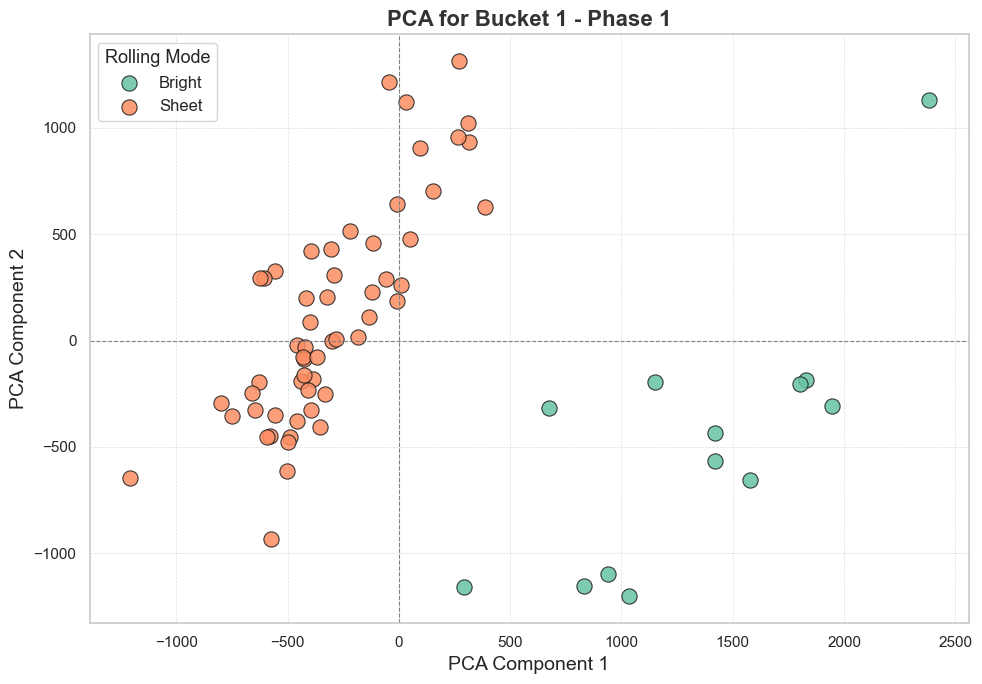

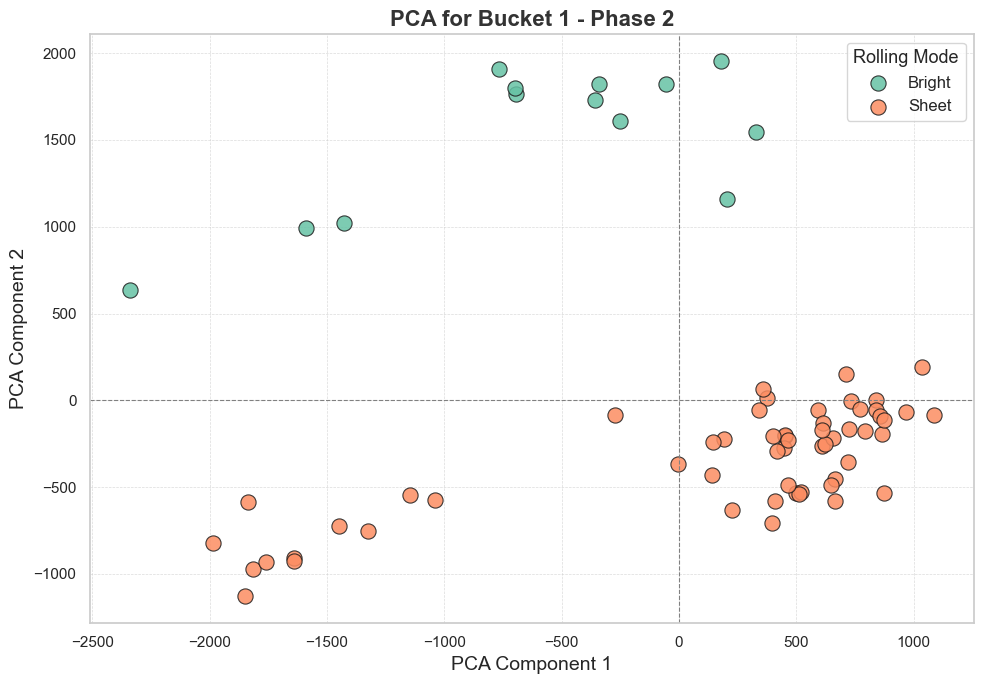

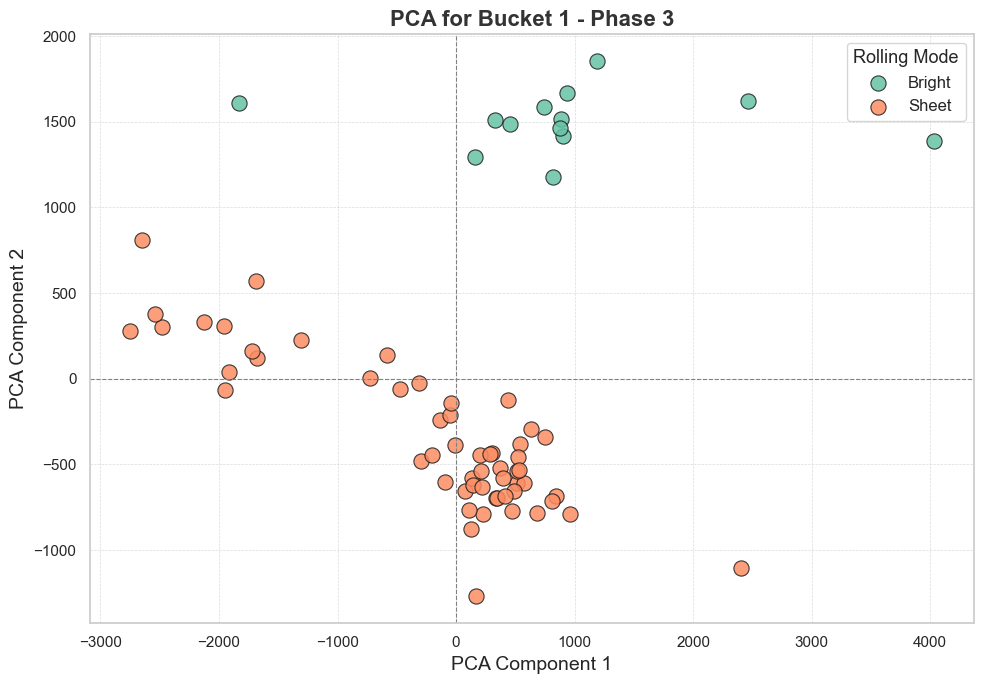

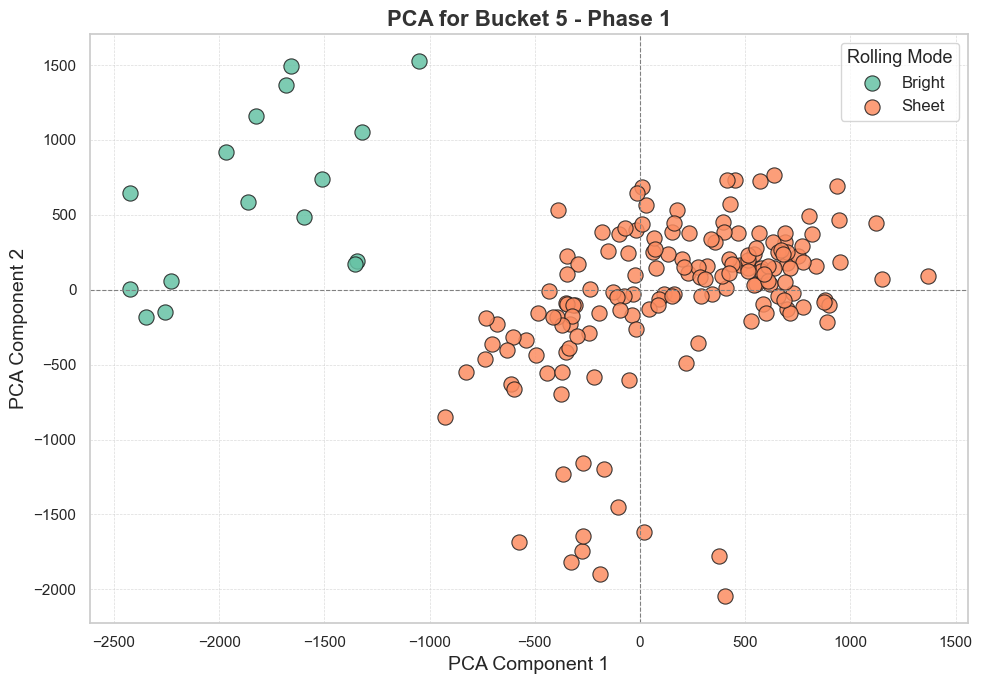

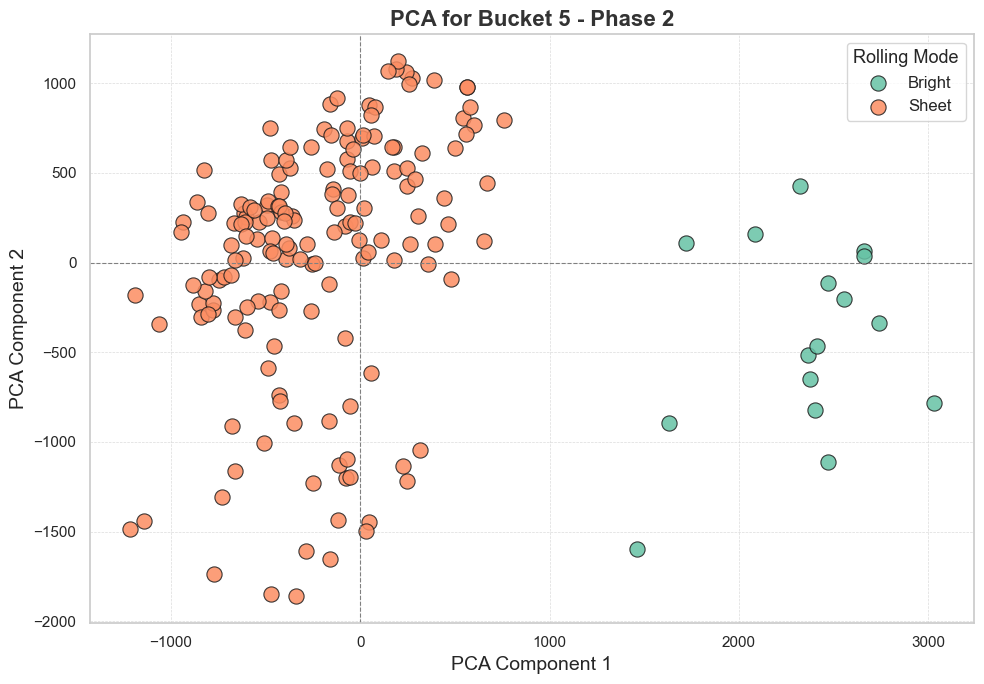

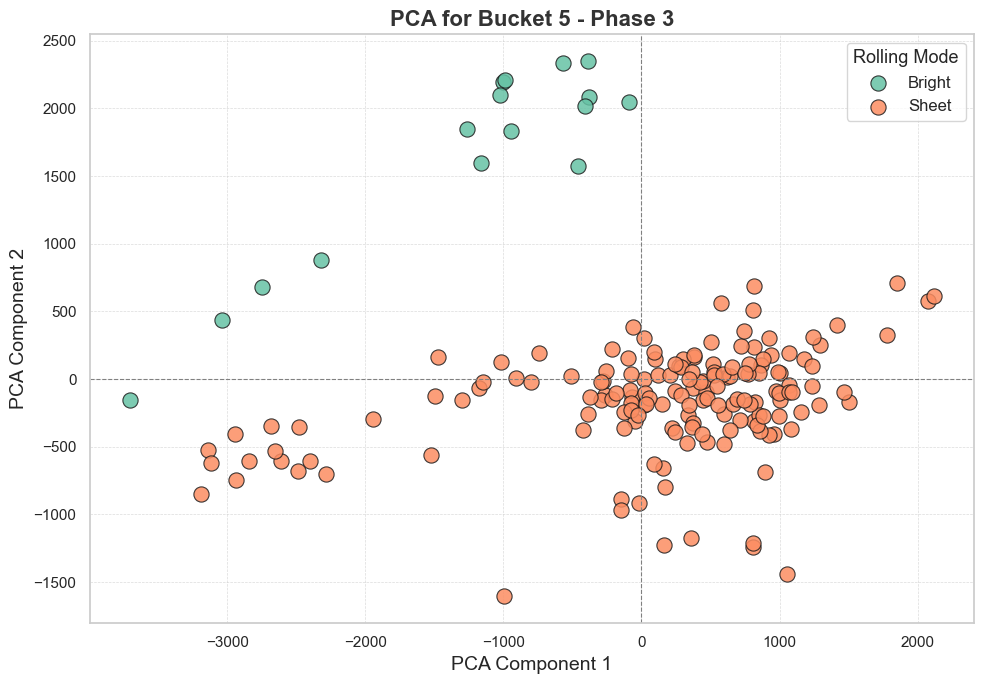

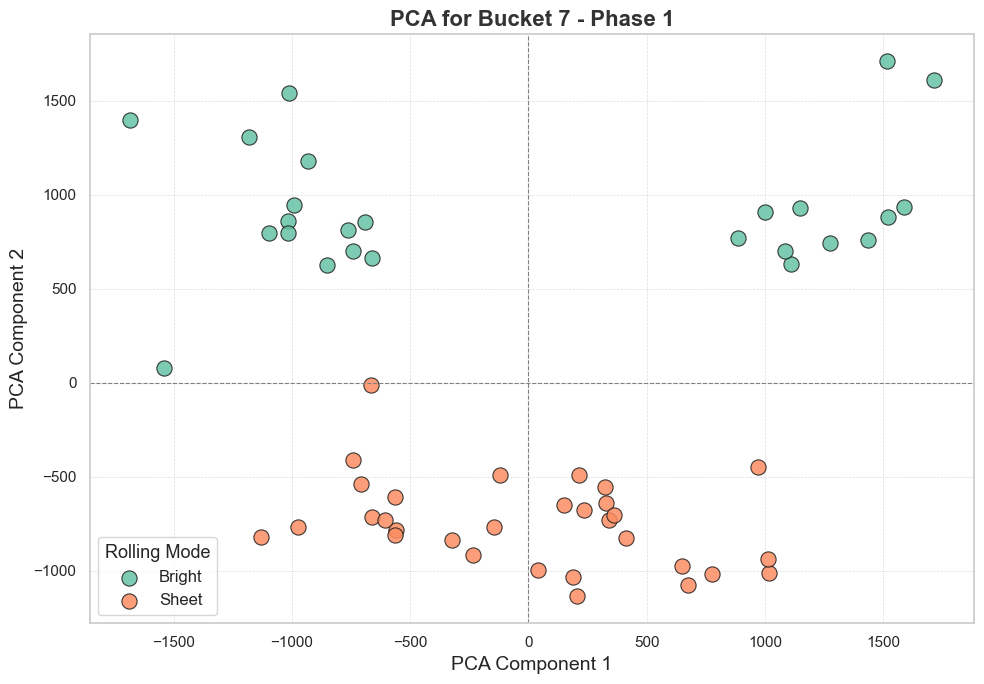

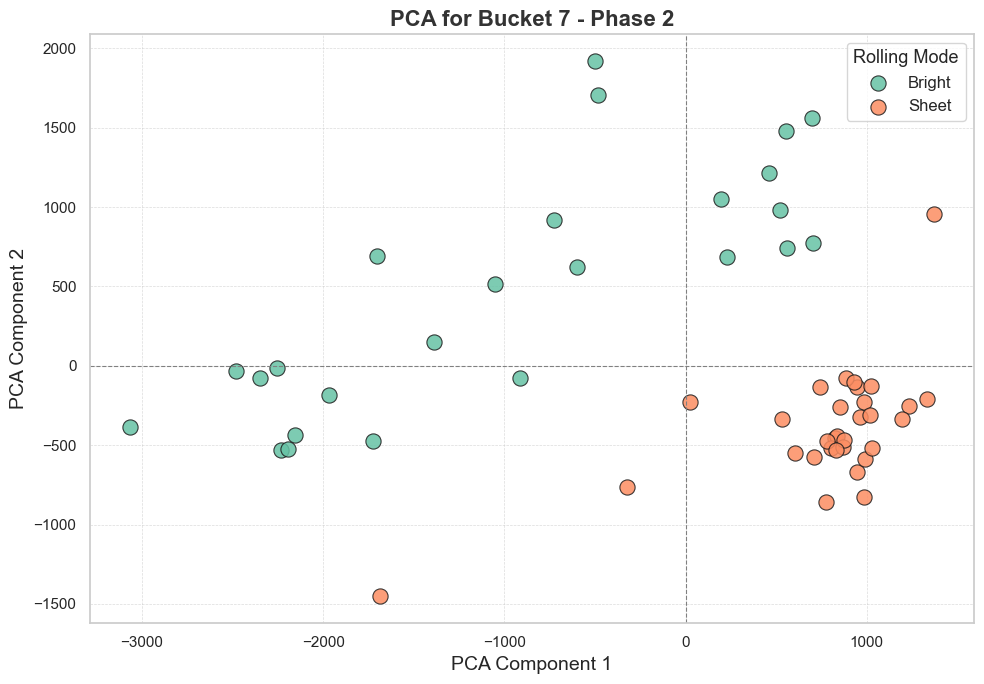

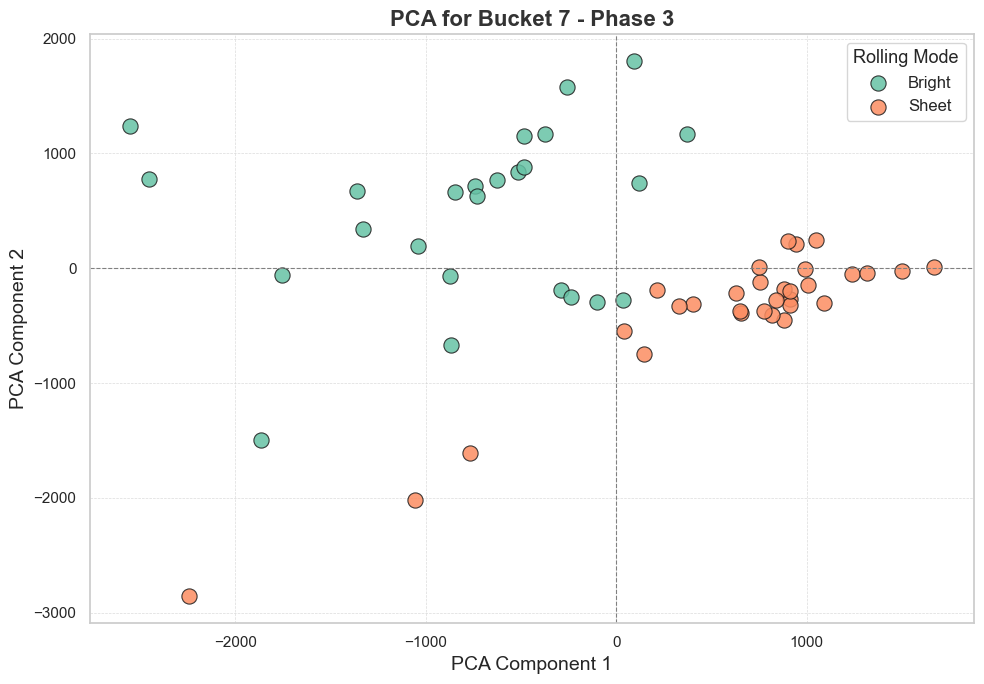

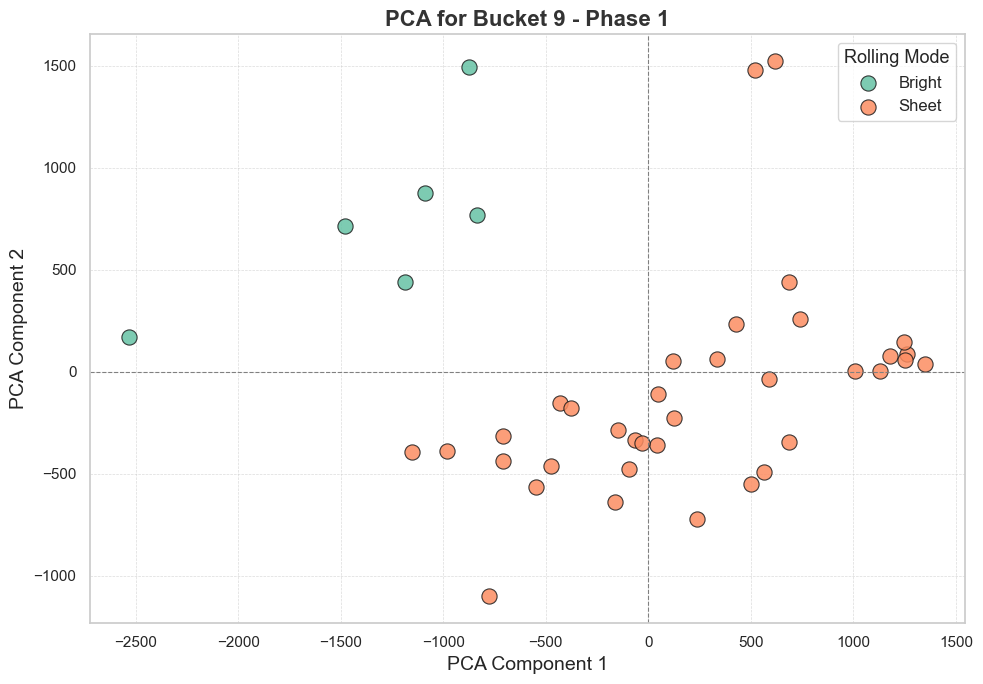

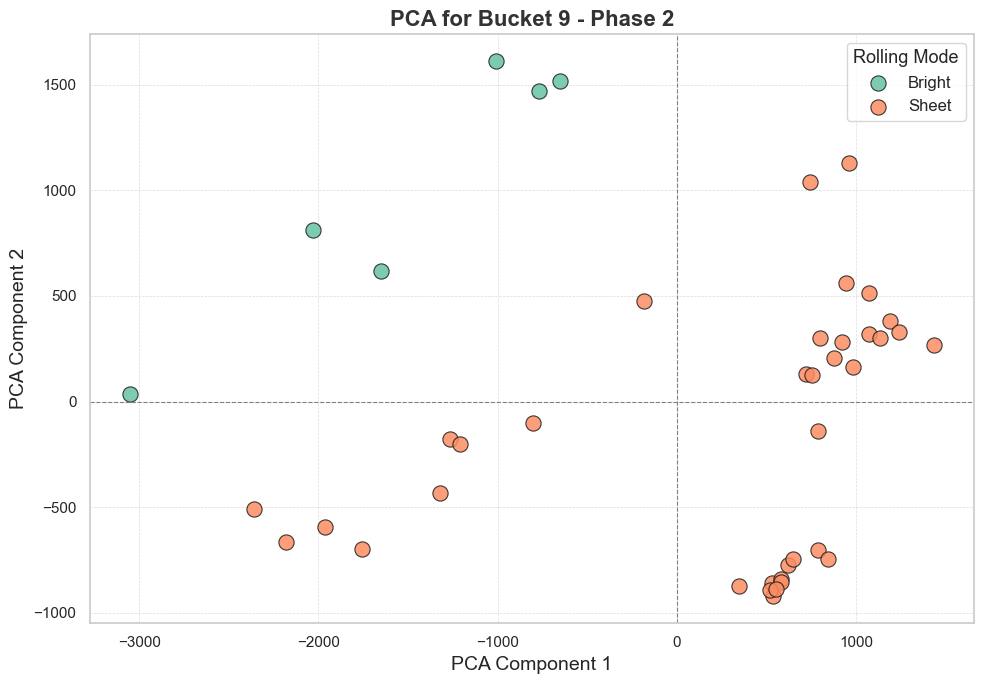

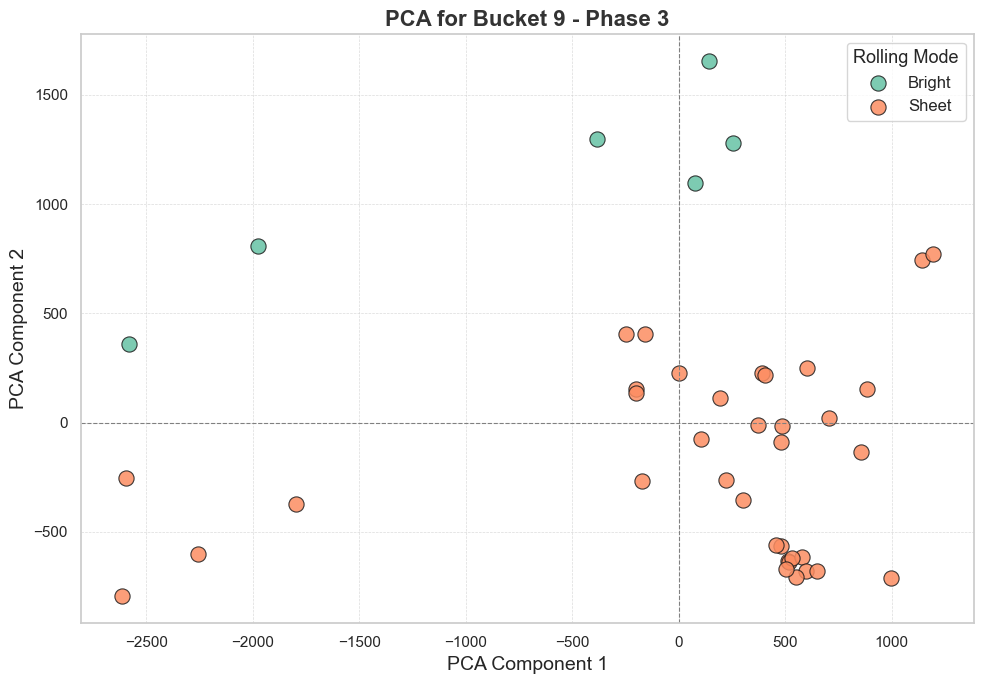

In [11]:
# bucketwise_pca_by_signals_rollingmode(df_filtered,bucket_col='Bucket_ID', signal_cols=signal_names)
bucketwise_pca_by_signals_rollingmode_phasewise(df_filtered,bucket_col = 'Bucket_ID',signal_cols=signal_names)

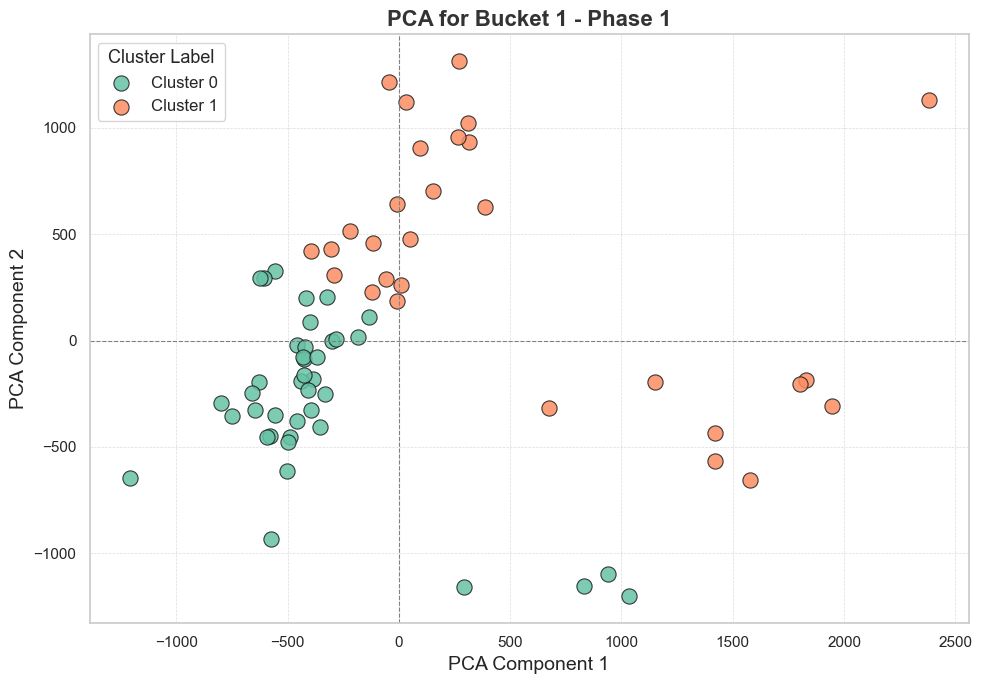

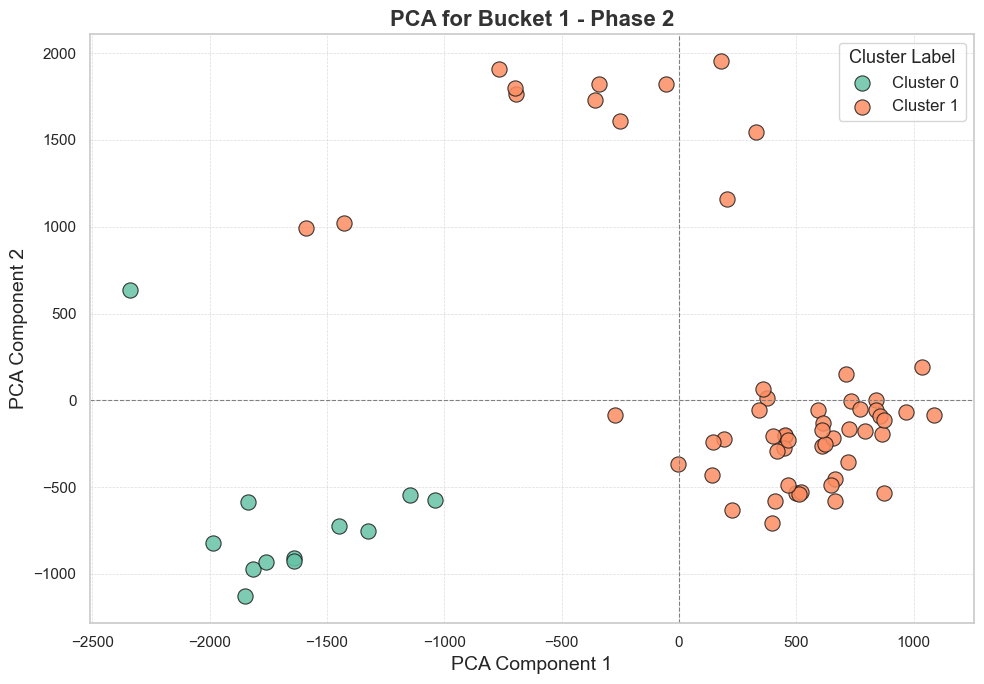

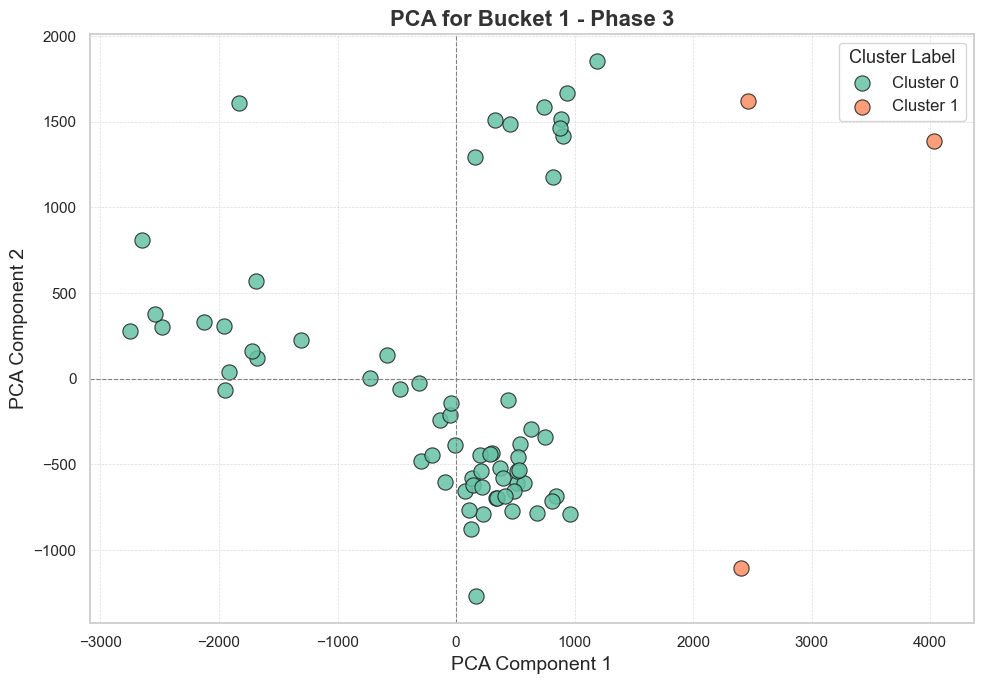

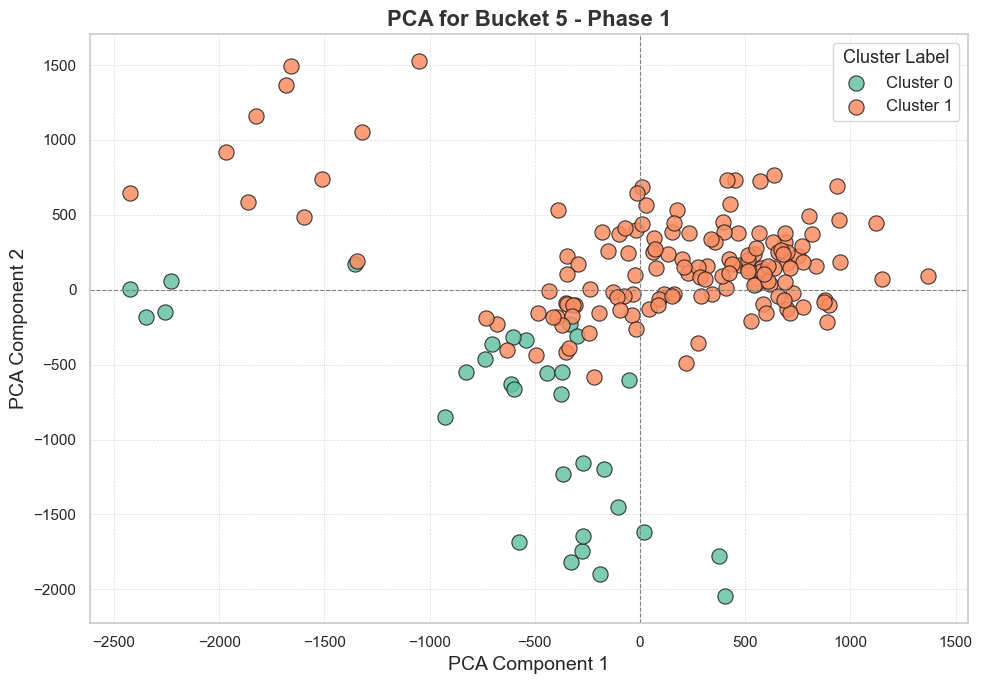

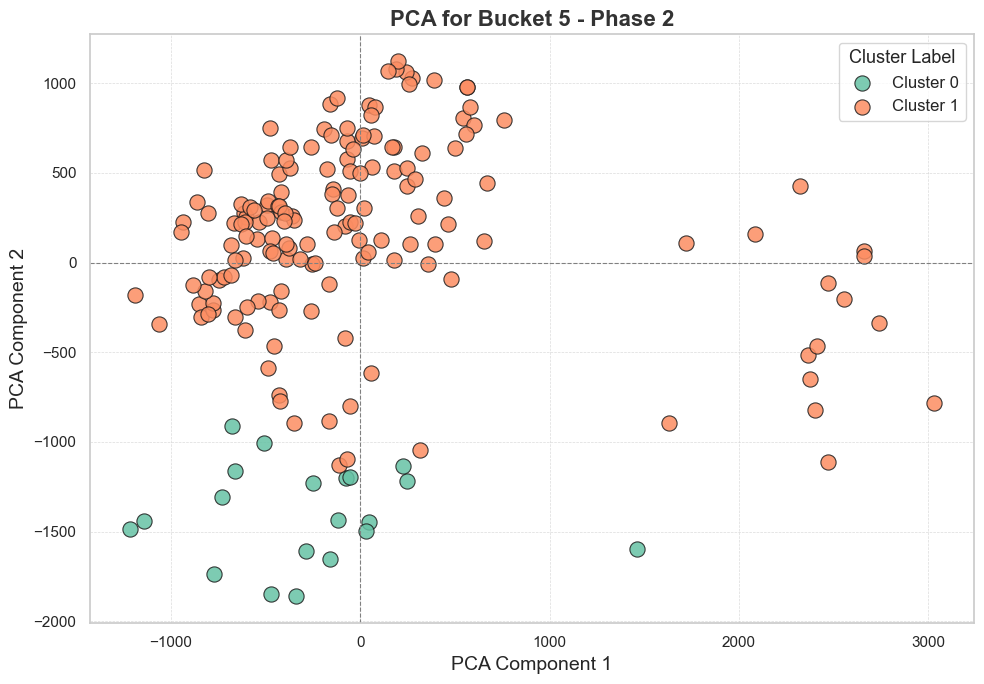

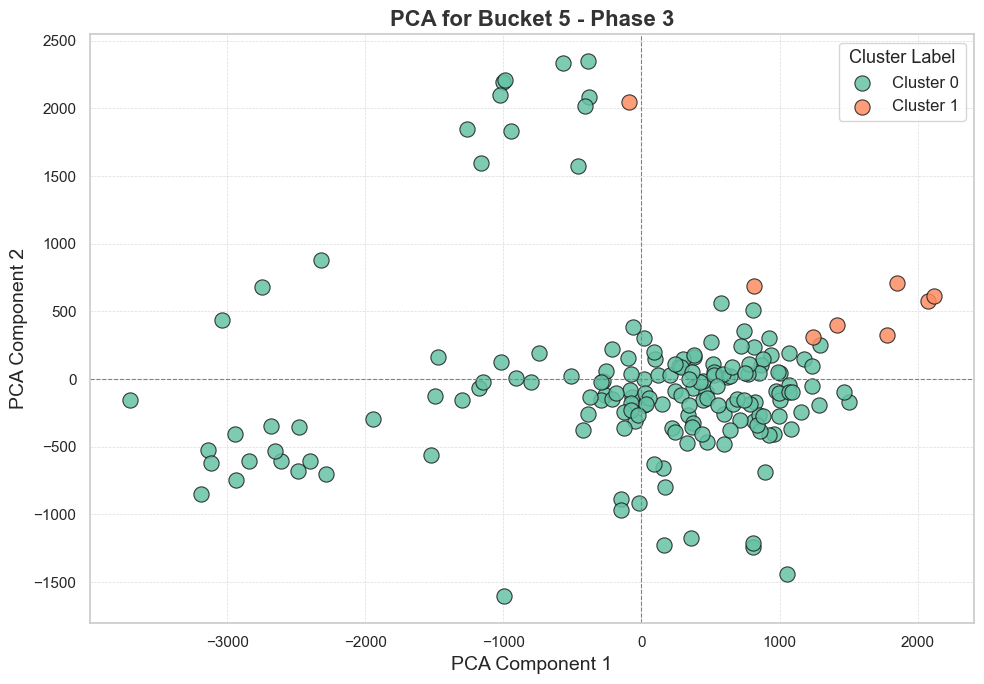

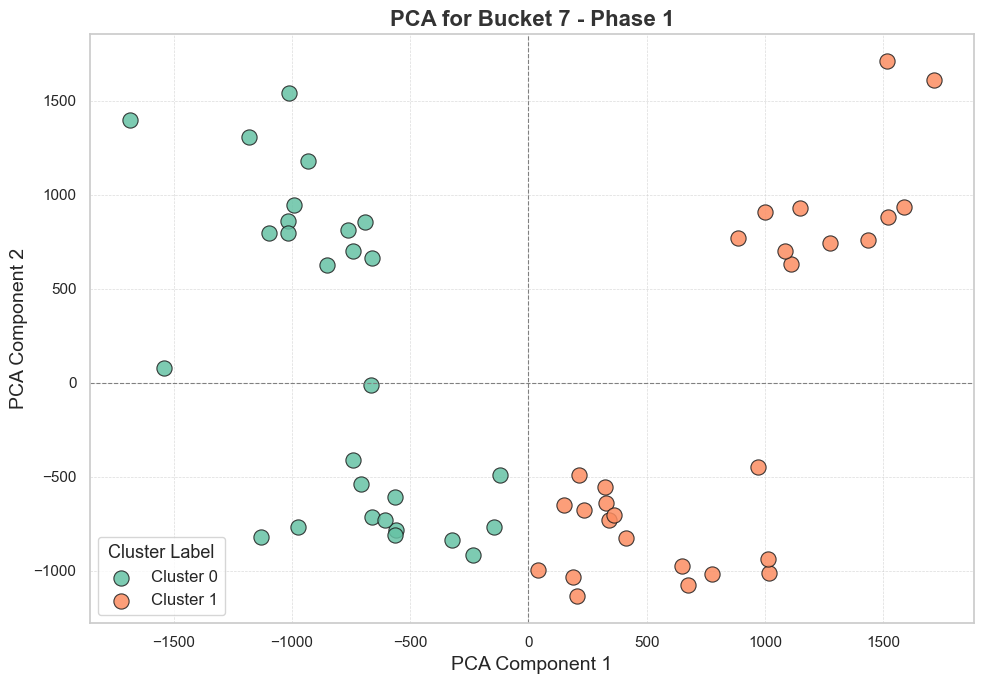

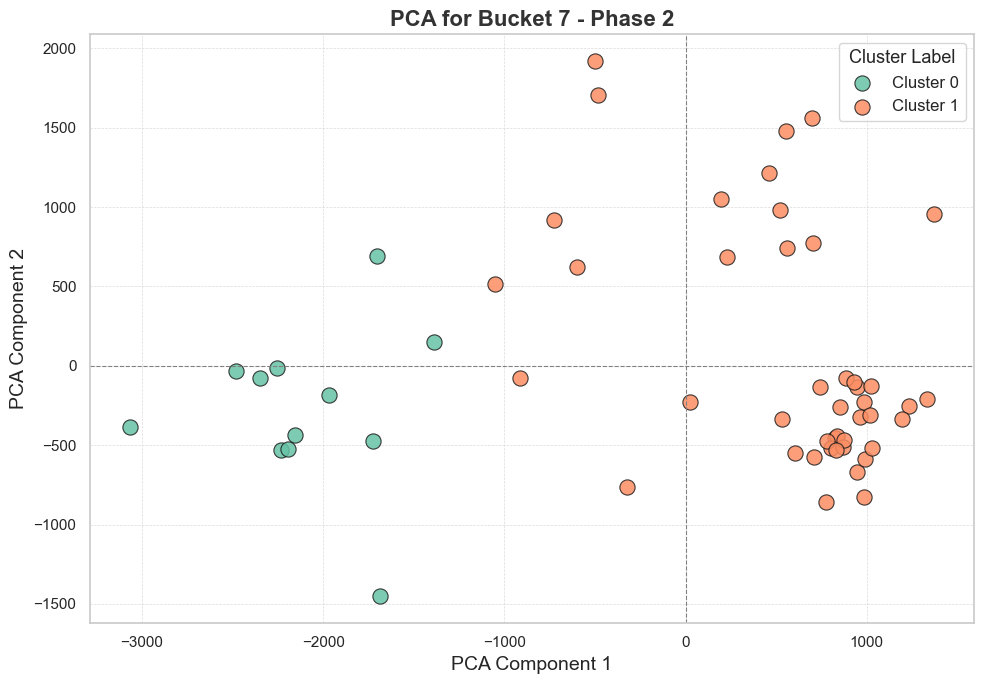

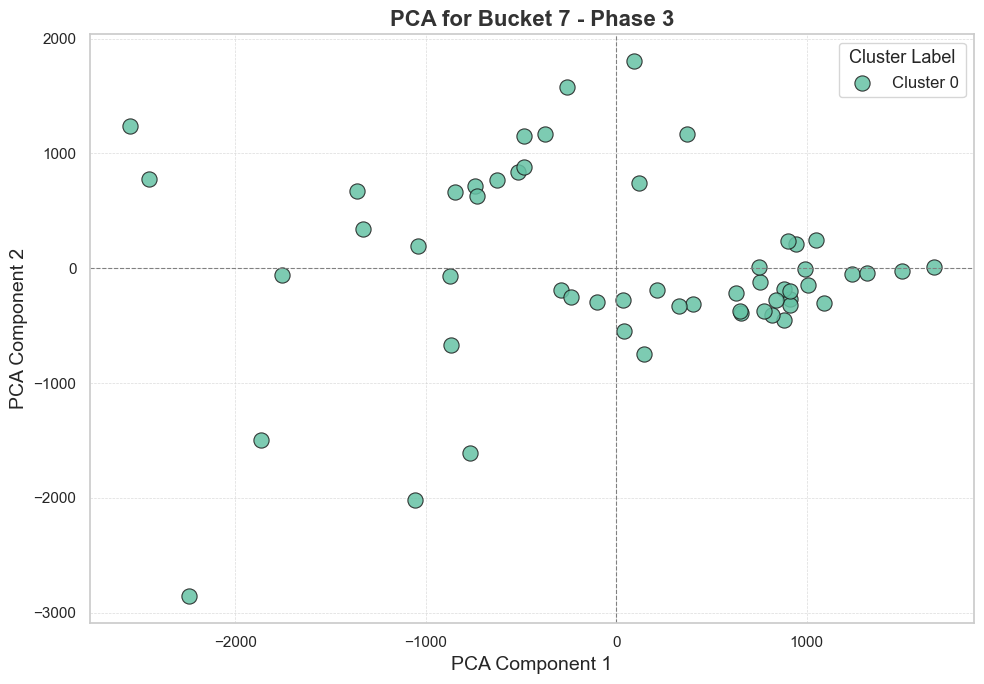

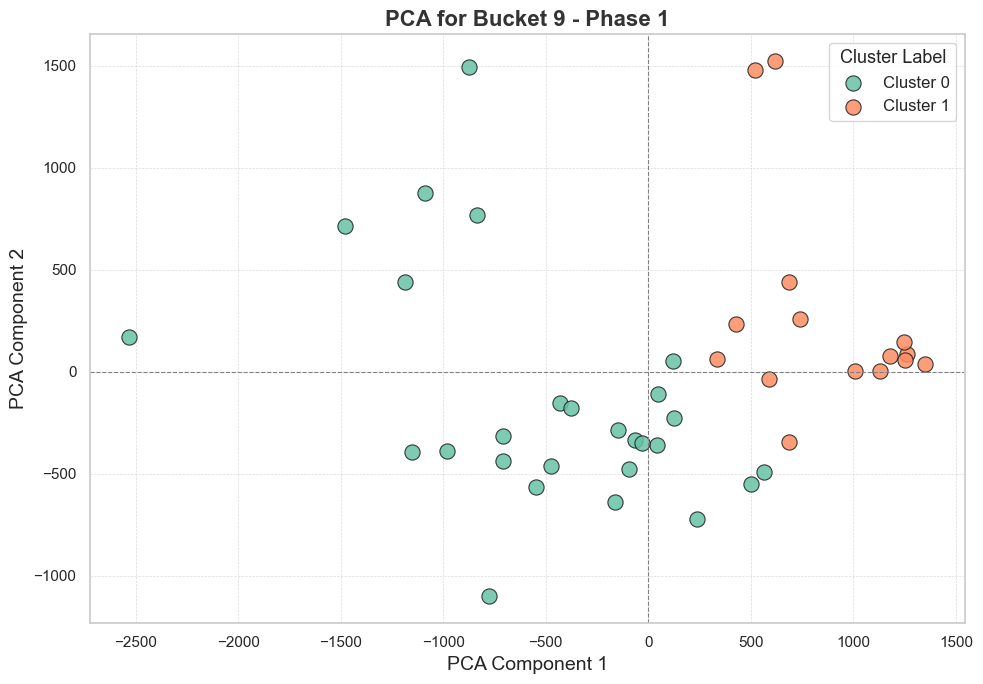

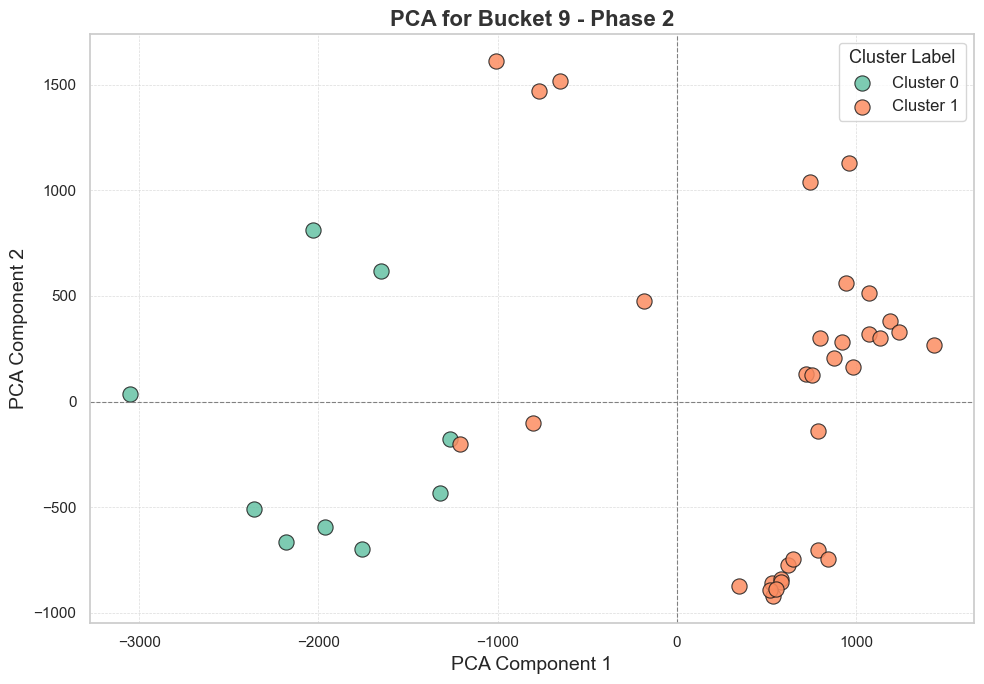

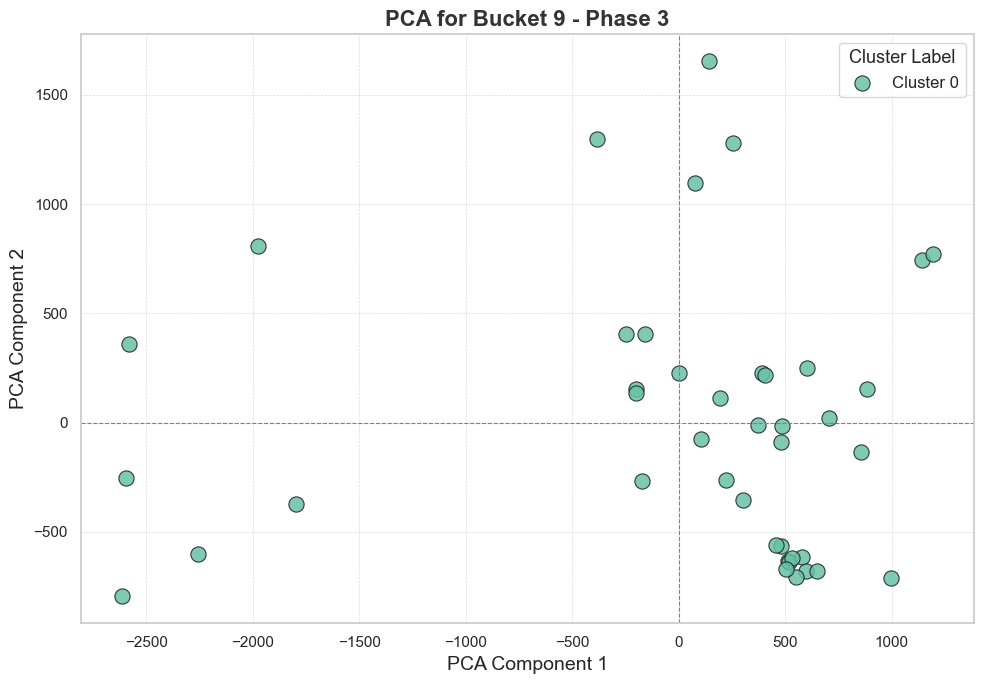

In [12]:
# bucketwise_pca_by_signals_cluster(df_filtered,bucket_col='Bucket_ID', signal_cols=signal_names)
bucketwise_pca_by_signals_cluster_phasewise(df_filtered,bucket_col = 'Bucket_ID',signal_cols=signal_names)